In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)

import json

In [2]:
df = pd.read_csv("../results/ner/intron-test-public-6346-clean_with_named_entity.csv")
print(len(df))
df.head(2)

6346


,idx,user_ids,accent,age_group,country,transcript,nchars,audio_ids,audio_paths,duration,...,domain,split,gender,has_entity,PER,LOC,ORG,entities,entities_group,entities_others
0,149716,5ab7b49ad1cab6392a764a69578dc822,twi,26-40,GH,Proteins break down to release amino acids which are used as fuel for hepatic gluconeogenesis to maintain the glucose needs of the brain.,136,3a21d00eec39a31f089b9b4f0f8afa21,/AfriSpeech-100/test/e696aff8-ce05-4c8e-a3b3-5634f3da50b9/3b55a5d83ae194039127818b59e5b78a.wav,10.776984,...,clinical,test,Female,0,NaN,NaN,NaN,NaN,NaN,NaN
1,360395,543c037ff44816e8b5ccd0d6cc92fe13,igbo,19-25,NG,To grant such a patent license to a party means to make such an agreement or commitment not to enforce a patent against the party.,128,544fbff921d13b224adbbb0f637196ed,/AfriSpeech-100/test/f28baac3-cdcd-45a2-888c-a59fdf586199/970f3cbab38845daedcf6a4c17c1741d.wav,12.390000,...,clinical,test,Female,0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

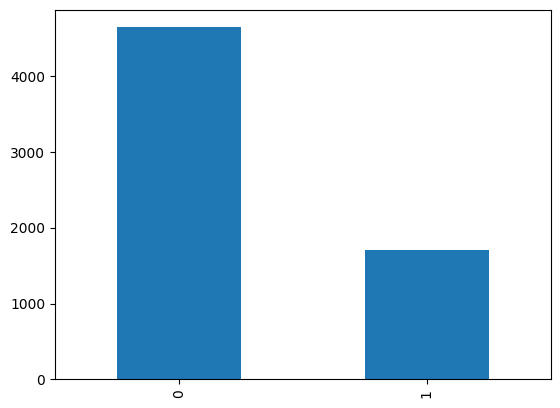

In [3]:
df.has_entity.value_counts().plot(kind="bar")

In [4]:
df_general = df[df.domain == "general"]
df_clinical = df[df.domain == "clinical"]

df.shape, df_general.shape, df_clinical.shape

((6346, 21), (2723, 21), (3623, 21))

In [5]:
df_ner_low_confidence = df[(df.entities.notna()) & (df.has_entity != 1)]
df_ner_low_confidence["entities_group"] = df_ner_low_confidence["entities_group"].apply(json.loads)
extr_filter = df_ner_low_confidence.entities_group.apply(lambda x: len([x[i]["entity_group"] for i in range(len(x)) if x[i]["entity_group"] in ("PER", "ORG", "LOC")]))
df_ner_low_confidence["extr_filter"] = extr_filter
df_ner_low_confidence = df_ner_low_confidence[df_ner_low_confidence["extr_filter"] != 0]

len(df_ner_low_confidence)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/3881206231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ner_low_confidence["entities_group"] = df_ner_low_confidence["entities_group"].apply(json.loads)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/3881206231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ner_low_confidence["extr_filter"] = extr_filter


90

In [6]:
df_entity = df[df.has_entity == 1].reset_index(drop=True)
df_entity_general = df_entity[df_entity.domain == "general"]
df_entity_clinical = df_entity[df_entity.domain == "clinical"]

df_entity.shape, df_entity_general.shape, df_entity_clinical.shape

((1703, 21), (1439, 21), (264, 21))

In [7]:
df_entity_2 = df_entity[(df_entity.PER.notna()) | (df_entity.LOC.notna())].reset_index(drop=True)
df_entity_2_general = df_entity_2[df_entity_2.domain == "general"]
df_entity_2_clinical = df_entity_2[df_entity_2.domain == "clinical"]

df_entity_2.shape, df_entity_2_general.shape, df_entity_2_clinical.shape

((1396, 21), (1215, 21), (181, 21))

In [8]:
df_w_entity = df[df.has_entity == 0].reset_index(drop=True)
df_w_entity = df_w_entity[~df_w_entity.idx.isin(df_ner_low_confidence.idx)]
df_w_entity_general = df_w_entity[df_w_entity.domain == "general"]
df_w_entity_clinical = df_w_entity[df_w_entity.domain == "clinical"]
df_w_entity.shape, df_w_entity_general.shape, df_w_entity_clinical.shape

((4553, 21), (1257, 21), (3296, 21))

In [9]:
#1284-->1257
1257+1439

2696

In [10]:
df_names = pd.read_csv("../data/African_names/List of Nigerian names - Sheet1.csv")
df_names2 = pd.read_csv("../data/African_names/mmc2-igbo names.csv", delimiter=";")
df_names3 = pd.read_csv("../data/African_names/AfricanNamesDatabase.csv")
df_names_list = df_names.YORUBA.str.lower().to_list() + df_names.HAUSA.str.lower().to_list()+ \
                    df_names.IBO.str.lower().to_list() + df_names2["Igbo Names"].str.lower().to_list() 
#                    + \ df_names3.Name.str.lower().to_list()
df_names_list = df_names_list
print(len(df_names_list))

df_entity_PER = df_entity_2[df_entity_2.PER.notna()]
df_entity_PER.loc[:, "entities_group"] = df_entity_PER.entities_group.apply(json.loads)
df_entity_PER.loc[:, "afri_ner"] = df_entity_PER.loc[:, "entities_group"].apply(lambda x: len([x[i]["word"] for i in range(len(x)) if x[i]["entity_group"] == "PER" if x[i]["word"].lower() in df_names_list]))
print(df_entity_PER.afri_ner.sum())

df_entity_PER_NG = df_entity_PER[df_entity_PER.afri_ner >= 1].reset_index(drop=True)
df_entity_PER_OTHER = df_entity_PER[df_entity_PER.afri_ner == 0].reset_index(drop=True)



df_entity_PER_NG_general = df_entity_PER_NG[df_entity_PER_NG.domain == "general"]
df_entity_PER_NG_clinical = df_entity_PER_NG[df_entity_PER_NG.domain == "clinical"]

df_entity_PER_OTHER_general = df_entity_PER_OTHER[df_entity_PER_OTHER.domain == "general"]
df_entity_PER_OTHER_clinical = df_entity_PER_OTHER[df_entity_PER_OTHER.domain == "clinical"]

print(df_entity_PER_NG.shape,df_entity_PER_NG_general.shape, df_entity_PER_NG_clinical.shape)
print(df_entity_PER_OTHER.shape,df_entity_PER_OTHER_general.shape, df_entity_PER_OTHER_clinical.shape)


2462
166
(136, 22) (117, 22) (19, 22)
(937, 22) (809, 22) (128, 22)


/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/1930282436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entity_PER.loc[:, "entities_group"] = df_entity_PER.entities_group.apply(json.loads)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/1930282436.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entity_PER.loc[:, "afri_ner"] = df_entity_PER.loc[:, "entities_group"].apply(lambda x: len([x[i]["word"] for i in range(len(x)) if x[i]["entity_group"] == "PER" if

In [11]:
df_entities_count = df_entity_2[df_entity_2.entities_group.notna()]
df_entities_count.entities_group = df_entities_count["entities_group"].apply(json.loads)
df_entities_count["entities_count"] = df_entities_count["entities_group"].apply(lambda x: len([x[i] for i in range(len(x)) if x[i]["entity_group"] in ["PER", "LOC", "ORG"]]))
df_entities_count["entities_count_PER"] = df_entities_count["entities_group"].apply(lambda x: len([x[i] for i in range(len(x)) if x[i]["entity_group"] == "PER"]))
df_entities_count["entities_count_LOC"] = df_entities_count["entities_group"].apply(lambda x: len([x[i] for i in range(len(x)) if x[i]["entity_group"] == "LOC"]))
df_entities_count["entities_count_ORG"] = df_entities_count["entities_group"].apply(lambda x: len([x[i] for i in range(len(x)) if x[i]["entity_group"] =="ORG"]))



In [15]:
df_entities_count[df_entities_count.domain == "general"]["entities_count"].sum(),\
df_entities_count[df_entities_count.domain == "clinical"]["entities_count"].sum()

(2478, 290)

In [16]:
df_entities_count[df_entities_count.domain == "general"]["entities_count_PER"].sum(),\
df_entities_count[df_entities_count.domain == "general"]["entities_count_LOC"].sum(), \
df_entities_count[df_entities_count.domain == "general"]["entities_count_ORG"].sum()

(1347, 733, 398)

In [17]:
df_entities_count[["PER", "LOC", "ORG", "transcript", "entities_group", "entities_count"]].sample(5)

,PER,LOC,ORG,transcript,entities_group,entities_count
770,['Zeribe'],NaN,NaN,Patient Zeribe presented on account of ammenorrhea of 4 months. Next line. Hot flushes associated with night sweats\n,"[{'entity_group': 'PER', 'score': 0.9998947381973267, 'word': 'Zeribe', 'start': 8, 'end': 14}, {'entity_group': 'DATE', 'score': 0.999989926815033, 'word': '4 months', 'start': 54, 'end': 62}]",1
881,"['Efe', 'Ilemobola']",['Iwo'],['Arinola hospital'],This morning Efe came to Arinola hospital in Iwo to see Dr Ilemobola\n,"[{'entity_group': 'DATE', 'score': 0.9754523038864136, 'word': 'This morning', 'start': 0, 'end': 12}, {'entity_group': 'PER', 'score': 0.9988852739334106, 'word': 'Efe', 'start': 13, 'end': 16}, {'entity_group': 'ORG', 'score': 0.9987178444862366, 'word': 'Arinola hospital', 'start': 25, 'end': 41}, {'entity_group': 'LOC', 'score': 0.9627955555915833, 'word': 'Iwo', 'start': 45, 'end': 48}, {'entity_group': 'PER', 'score': 0.9999983906745911, 'word': 'Ilemobola', 'start': 59, 'end': 68}]",4
912,['Pickett'],['Washington'],NaN,"We figured our best chance would be to ride out the storm on our own property in Washington where we could at the very least provide for ourselves off the land, Pickett says.\n","[{'entity_group': 'LOC', 'score': 0.9999974966049194, 'word': 'Washington', 'start': 81, 'end': 91}, {'entity_group': 'PER', 'score': 0.9976040124893188, 'word': 'Pickett', 'start': 161, 'end': 168}]",2
302,['Donald Trump'],"['', 'WASHINGTON', 'US']",NaN,"WASHINGTON, July 18: US President Donald Trump on Saturday vowed never to order Americans to wear masks to contain the spread of coronavirus.\n","[{'entity_group': 'LOC', 'score': 0.9999979734420776, 'word': '', 'start': 0, 'end': 1}, {'entity_group': 'LOC', 'score': 0.9932478070259094, 'word': 'WASHINGTON', 'start': 0, 'end': 10}, {'entity_group': 'DATE', 'score': 0.9999870657920837, 'word': 'July 18', 'start': 12, 'end': 19}, {'entity_group': 'LOC', 'score': 0.9999887943267822, 'word': 'US', 'start': 21, 'end': 23}, {'entity_group': 'PER', 'score': 0.9999979734420776, 'word': 'Donald Trump', 'start': 34, 'end': 46}, {'entity_group': 'DATE', 'score': 0.9999934434890747, 'word': 'Saturday', 'start': 50, 'end': 58}]",4
411,['Samad'],NaN,NaN,"It was gathered that Samad, who is an internet fraudster, opened the academy in a three-bedroom flat and was training young men in the art of defrauding people in the apartment which he was said to have rented for the sum of N3 million per annum.\n","[{'entity_group': 'PER', 'score': 0.9988924264907837, 'word': 'Samad', 'start': 21, 'end': 26}]",1


In [18]:
# pd.DataFrame(set(df_names_list), columns=["Name"]).to_csv("../data/African_names/nigerian_names.csv", index=None)

In [19]:
df_entity_general[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
703,NaN,"['Mozambique', 'South Africa']",NaN,REPORTS say our country was set to clear its arrears with Mozambique and South Africa in order to revive a trilateral agreement with the neighbouring countries as part of immediate-term solution to stabilise local power supplies.,"[{""entity_group"": ""LOC"", ""score"": 0.9999348521232605, ""word"": ""Mozambique"", ""start"": 58, ""end"": 68}, {""entity_group"": ""LOC"", ""score"": 0.999995231628418, ""word"": ""South Africa"", ""start"": 73, ""end"": 85}]"
1057,"['Peter Okoye', 'Mr P']",NaN,NaN,"Nigerian singer, Peter Okoye, popularly known as Mr P, has stated that people without their Permanent Voters Cards were not allowed into his home and office.\n","[{""entity_group"": ""PER"", ""score"": 0.9999988675117493, ""word"": ""Peter Okoye"", ""start"": 17, ""end"": 28}, {""entity_group"": ""PER"", ""score"": 0.9999970197677612, ""word"": ""Mr P"", ""start"": 49, ""end"": 53}]"
352,['A Boro'],NaN,NaN,"Fri 28 Aug, 1992 next line. Neuro: Pt Amuka Borokini 02 August, 1991\n","[{""entity_group"": ""DATE"", ""score"": 0.9999940991401672, ""word"": ""Fri 28 Aug, 1992"", ""start"": 0, ""end"": 16}, {""entity_group"": ""PER"", ""score"": 0.858053982257843, ""word"": ""A Boro"", ""start"": 38, ""end"": 48}, {""entity_group"": ""DATE"", ""score"": 0.9999803900718689, ""word"": ""02 August, 1991"", ""start"": 53, ""end"": 68}]"
1572,NaN,NaN,['Tel'],"Telnet is a client-server protocol, based on a reliable connection-oriented transport.","[{""entity_group"": ""ORG"", ""score"": 0.8628647327423096, ""word"": ""Tel"", ""start"": 0, ""end"": 3}]"
1699,NaN,['Lagos'],NaN,Security beefed up at Lagos worship centres,"[{""entity_group"": ""LOC"", ""score"": 0.9999194145202637, ""word"": ""Lagos"", ""start"": 22, ""end"": 27}]"


In [20]:
len(set(df_names_list)), len(df_names_list)

(1718, 2462)

In [21]:
df_entity_clinical[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
1319,NaN,['US'],['UNILAT UP EXT'],Sunday 01 March 1992 1: 27 PM UNILAT UP EXT VEINS US LEFT PORT Reason: ?,"[{""entity_group"": ""DATE"", ""score"": 0.9999929666519165, ""word"": ""Sunday 01 March 1992 1: 27 PM"", ""start"": 0, ""end"": 29}, {""entity_group"": ""ORG"", ""score"": 0.9991921186447144, ""word"": ""UNILAT UP EXT"", ""start"": 30, ""end"": 43}, {""entity_group"": ""LOC"", ""score"": 0.999198853969574, ""word"": ""US"", ""start"": 50, ""end"": 52}]"
639,['Af'],NaN,NaN,Afib with HR 100's.,"[{""entity_group"": ""PER"", ""score"": 0.8314940929412842, ""word"": ""Af"", ""start"": 0, ""end"": 2}]"
1138,['Maroocoolay'],NaN,NaN,Dr. Maroocoolay was notified by telephone on 18-10-1981 at 11: 30 am.,"[{""entity_group"": ""PER"", ""score"": 0.9999776482582092, ""word"": ""Maroocoolay"", ""start"": 4, ""end"": 15}, {""entity_group"": ""DATE"", ""score"": 0.9999966621398926, ""word"": ""18-10-1981"", ""start"": 45, ""end"": 55}, {""entity_group"": ""DATE"", ""score"": 0.999966025352478, ""word"": ""11: 30 am"", ""start"": 59, ""end"": 68}]"
1086,['Adaiba Ihuoma'],NaN,NaN,Patient is hypotensive despite high dose phenylephrine 2.8 mcg/kg/min and low cardiac index Adaiba Ihuoma monitorLEFT ATRIUM: Normal LA size.,"[{""entity_group"": ""PER"", ""score"": 0.9985916018486023, ""word"": ""Adaiba Ihuoma"", ""start"": 92, ""end"": 105}]"
720,['Josh Harry'],['Missouri'],NaN,"Josh Harry, Missouri 43478","[{""entity_group"": ""PER"", ""score"": 0.9999989867210388, ""word"": ""Josh Harry"", ""start"": 0, ""end"": 10}, {""entity_group"": ""LOC"", ""score"": 0.9945382475852966, ""word"": ""Missouri"", ""start"": 12, ""end"": 20}]"


In [22]:
df_entity_2_general[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
1208,['Ogoodoo Bere'],NaN,NaN,"Menstrual bleeding for 14 days, contained with 4 pads per day with implant insertion. next line. Ogoodoo Berekum Dizziness, fainting spells or loss of consciousness","[{""entity_group"": ""DATE"", ""score"": 0.9999943375587463, ""word"": ""14 days"", ""start"": 23, ""end"": 30}, {""entity_group"": ""PER"", ""score"": 0.8099793791770935, ""word"": ""Ogoodoo Bere"", ""start"": 97, ""end"": 109}]"
375,NaN,['Nigeria'],['Nigerian Law School'],There is no gainsaying that the Nigerian Law School is the only institution responsible for vocational training of lawyers in Nigeria.\n,"[{""entity_group"": ""ORG"", ""score"": 0.9999964237213135, ""word"": ""Nigerian Law School"", ""start"": 32, ""end"": 51}, {""entity_group"": ""LOC"", ""score"": 0.9999991655349731, ""word"": ""Nigeria"", ""start"": 126, ""end"": 133}]"
316,NaN,['Lake Victoria'],NaN,"In Lake Victoria, an earthquake forms a underwater fault line.","[{""entity_group"": ""LOC"", ""score"": 0.9999939203262329, ""word"": ""Lake Victoria"", ""start"": 3, ""end"": 16}]"
1226,"['Og', 'unsola Chikelue']",['Ikirun'],NaN,DR Ogunsola Chikelue IN CLOSE ICU ATTENDANCE at Ikirun\n,"[{""entity_group"": ""PER"", ""score"": 0.9999995231628418, ""word"": ""Og"", ""start"": 3, ""end"": 5}, {""entity_group"": ""PER"", ""score"": 0.9877643585205078, ""word"": ""unsola Chikelue"", ""start"": 5, ""end"": 20}, {""entity_group"": ""LOC"", ""score"": 0.9997634887695312, ""word"": ""Ikirun"", ""start"": 48, ""end"": 54}]"
597,['Obadiah'],NaN,['CBN'],"Not long after arrival at CBN hospital, Obadiahs wife was said to have complained about shabby treatment of her husband.","[{""entity_group"": ""ORG"", ""score"": 0.9997549057006836, ""word"": ""CBN"", ""start"": 26, ""end"": 29}, {""entity_group"": ""PER"", ""score"": 0.9710176587104797, ""word"": ""Obadiah"", ""start"": 40, ""end"": 47}]"


In [23]:
df_entity_2_clinical[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
948,['Iheanyi Ayomide'],NaN,NaN,Please see Web OMR for additional details Iheanyi Ayomide MS CCC-SLP Pager 13: 44,"[{""entity_group"": ""PER"", ""score"": 0.9945760369300842, ""word"": ""Iheanyi Ayomide"", ""start"": 42, ""end"": 57}]"
1000,['GI'],NaN,NaN,GI: CONT ON DELIVER AT 50CC/HR AND TOLERATED WELL.,"[{""entity_group"": ""PER"", ""score"": 0.998880922794342, ""word"": ""GI"", ""start"": 0, ""end"": 2}]"
1245,['Joy'],NaN,NaN,"Joyner, RN61120700 Patient rates pain at 410.","[{""entity_group"": ""PER"", ""score"": 0.9323287010192871, ""word"": ""Joy"", ""start"": 0, ""end"": 3}]"
929,"['vanco', 'Zosyn']",NaN,NaN,On vanco and Zosyn,"[{""entity_group"": ""PER"", ""score"": 0.9827396869659424, ""word"": ""vanco"", ""start"": 3, ""end"": 8}, {""entity_group"": ""PER"", ""score"": 0.9968042969703674, ""word"": ""Zosyn"", ""start"": 13, ""end"": 18}]"
1319,['Matarah'],NaN,NaN,Pt Matarah 10 out of arm and infiltrated.,"[{""entity_group"": ""PER"", ""score"": 0.9934322237968445, ""word"": ""Matarah"", ""start"": 3, ""end"": 10}]"


In [24]:
df_w_entity_general[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
3443,NaN,NaN,NaN,"Every year, hundreds of millions of patients are affected by health care-associated infections, leading to the death of 1 in 10 infected patients.\n","[{""entity_group"": ""DATE"", ""score"": 0.997645378112793, ""word"": ""Every year"", ""start"": 0, ""end"": 10}]"
2386,NaN,NaN,NaN,"At some point in our lives, we have all fantasized about having so much money than we can imagine, about winning a lottery, getting a money rain miracle, and living a high-end life. Build a mansion, drive the best cars, and travel around the world.",NaN
1741,NaN,NaN,NaN,"The 18-year-old woman was stabbed several times during the attack, but managed to make her way to the street to find help.","[{""entity_group"": ""DATE"", ""score"": 0.9999588131904602, ""word"": ""18-year-old"", ""start"": 4, ""end"": 15}]"
1937,NaN,NaN,NaN,"Pac-12 athletes, however, are ready to take a stand against a conference that wants players on campus and in the gym, at a time when most college students wonder if their classes will start online later this month.","[{""entity_group"": ""DATE"", ""score"": 0.6983169317245483, ""word"": ""later"", ""start"": 197, ""end"": 202}, {""entity_group"": ""DATE"", ""score"": 0.9540565013885498, ""word"": ""this month"", ""start"": 203, ""end"": 213}]"
1281,NaN,NaN,NaN,Its really going crazy.,NaN


In [25]:
df_w_entity_clinical[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
51,NaN,NaN,NaN,EKG: Okubhatobofegha Ackallea F 82 06 Apr 2024,"[{""entity_group"": ""DATE"", ""score"": 0.9812114834785461, ""word"": ""Apr 2024"", ""start"": 38, ""end"": 46}]"
1681,NaN,NaN,NaN,fXa level on 8 was 1.9 and dose was decreased to 80mg Hospital Tanda..,NaN
2617,NaN,NaN,NaN,"Fall from playground swing, subsequent encounter. TABLET, ORAL SIMVASTATIN, SIMVASTATIN, 80MG. Newborn affected by maternal death",NaN
450,NaN,NaN,NaN,"Note pertinent patient and family education and any patient reaction to this procedure, including patient pain levels and effectiveness of nonpharmacologic interventions or analgesia if administered.",NaN
2175,NaN,NaN,NaN,She was out of bed with PhysicalTherapy without event.,NaN


In [26]:
df_entity_PER_NG_general[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
20,['Adanne'],NaN,NaN,"Pt Adanne has vomited many times this morning 07 Jul, 2027 before Dr Emeka came.","[{'entity_group': 'PER', 'score': 0.9992592334747314, 'word': 'Adanne', 'start': 3, 'end': 9}, {'entity_group': 'DATE', 'score': 0.6551146507263184, 'word': 'this', 'start': 33, 'end': 37}, {'entity_group': 'DATE', 'score': 0.9861941337585449, 'word': 'morning 07 Jul, 2027', 'start': 38, 'end': 58}, {'entity_group': 'PER', 'score': 0.7826485633850098, 'word': 'Emeka', 'start': 69, 'end': 74}]"
131,['Uzoka'],['Maiduguri'],NaN,Her 22 year old sister Uzoka lives w/ her in Maiduguri and takes care of her.\n,"[{'entity_group': 'DATE', 'score': 0.9999809861183167, 'word': '22 year old', 'start': 4, 'end': 15}, {'entity_group': 'PER', 'score': 0.9985455870628357, 'word': 'Uzoka', 'start': 23, 'end': 28}, {'entity_group': 'LOC', 'score': 0.999844491481781, 'word': 'Maiduguri', 'start': 45, 'end': 54}]"
78,"['Museveni', 'Buhari']",['Balogun Stadium'],NaN,"Seeing how the ghost of Museveni was walking majestically round the Balogun Stadium, the Buhari group was said to have ran round to jerk the slush fund to 3,000.\n","[{'entity_group': 'PER', 'score': 0.9999949932098389, 'word': 'Museveni', 'start': 24, 'end': 32}, {'entity_group': 'LOC', 'score': 0.9999313354492188, 'word': 'Balogun Stadium', 'start': 68, 'end': 83}, {'entity_group': 'PER', 'score': 0.9996496438980103, 'word': 'Buhari', 'start': 89, 'end': 95}]"
72,"['Oyetola', 'Ismail Omipidan', 'Tinubu']",NaN,NaN,"Oyetola, in a statement by his Chief Press Secretary, Ismail Omipidan, noted that the emergence of Tinubu in the hitch-free electoral process was also a clear indication that the country was on the verge of democratic rejuvenation.","[{'entity_group': 'PER', 'score': 0.9996731281280518, 'word': 'Oyetola', 'start': 0, 'end': 7}, {'entity_group': 'PER', 'score': 0.9999988079071045, 'word': 'Ismail Omipidan', 'start': 54, 'end': 69}, {'entity_group': 'PER', 'score': 0.999962329864502, 'word': 'Tinubu', 'start': 99, 'end': 105}]"
108,['Abdulquadri'],['Kabba AT'],NaN,"Emergency Ambulance services arrived at Kaduna Hospital, Kabba AT 1AM with the Abdulquadri family.\n","[{'entity_group': 'LOC', 'score': 0.7915459871292114, 'word': 'Kaduna Hospital', 'start': 40, 'end': 55}, {'entity_group': 'ORG', 'score': 0.5422255396842957, 'word': ',', 'start': 55, 'end': 56}, {'entity_group': 'LOC', 'score': 0.802926242351532, 'word': 'Kabba AT', 'start': 57, 'end': 65}, {'entity_group': 'DATE', 'score': 0.9371374845504761, 'word': '1AM', 'start': 66, 'end': 69}, {'entity_group': 'PER', 'score': 0.999992847442627, 'word': 'Abdulquadri', 'start': 79, 'end': 90}]"


In [27]:
df_entity_PER_NG_clinical[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
54,['Adebola'],NaN,NaN,NICU Nursing Septic WorkupBaby girl Adebola to NICU for septic workup for maternal temp 101.5 pt refused abx prior to delivery.,"[{'entity_group': 'PER', 'score': 0.9993385076522827, 'word': 'Adebola', 'start': 36, 'end': 43}]"
81,['Aderiyike'],NaN,NaN,Asking if she could bring Aderiyike some t-shirts to wear affect appropriate on phone.,"[{'entity_group': 'PER', 'score': 0.9981058239936829, 'word': 'Aderiyike', 'start': 26, 'end': 35}]"
88,['Chikaodinaka'],NaN,NaN,Mr. Chikaodinaka is a 30y/o gentleman with history of PUD recurrent diverticulitis s/p illeostomy with history of illioconduit in recent history of GI bleed 5 weeks ago complicated by retained small bowel camera who presented with an acute GI bleed.,"[{'entity_group': 'PER', 'score': 0.9999840259552002, 'word': 'Chikaodinaka', 'start': 4, 'end': 16}, {'entity_group': 'DATE', 'score': 0.8833997249603271, 'word': '30y/o', 'start': 22, 'end': 27}, {'entity_group': 'DATE', 'score': 0.9999968409538269, 'word': '5 weeks ago', 'start': 157, 'end': 168}]"
42,"['Ogoogeay', 'Chimamkpa']",NaN,NaN,Ogoogeay daughter Chimamkpa can be reached at,"[{'entity_group': 'PER', 'score': 0.8791118860244751, 'word': 'Ogoogeay', 'start': 0, 'end': 8}, {'entity_group': 'PER', 'score': 0.9954522848129272, 'word': 'Chimamkpa', 'start': 18, 'end': 27}]"
49,"['Ajakifa', 'with', 'B', 'ang']",NaN,NaN,Ajakifa spoke withBang at bedside.,"[{'entity_group': 'PER', 'score': 0.9715902805328369, 'word': 'Ajakifa', 'start': 0, 'end': 7}, {'entity_group': 'PER', 'score': 0.9864739179611206, 'word': 'with', 'start': 14, 'end': 18}, {'entity_group': 'PER', 'score': 0.9969893097877502, 'word': 'B', 'start': 18, 'end': 19}, {'entity_group': 'PER', 'score': 0.9952310919761658, 'word': 'ang', 'start': 19, 'end': 22}]"


In [28]:
df_entity_PER_OTHER_general[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
368,['Axel Fredrik Cronstedt'],NaN,NaN,Nickel was isolated as a metal and classified as a chemical element by Axel Fredrik Cronstedt in 1751.\n,"[{'entity_group': 'PER', 'score': 0.9999982118606567, 'word': 'Axel Fredrik Cronstedt', 'start': 71, 'end': 93}, {'entity_group': 'DATE', 'score': 0.9999747276306152, 'word': '1751', 'start': 97, 'end': 101}]"
124,['Chance'],NaN,NaN,The incident allegedly happened on Thursday afternoon and Chance was given the opportunity to tell his side of the story.,"[{'entity_group': 'DATE', 'score': 0.9999719262123108, 'word': 'Thursday afternoon', 'start': 35, 'end': 53}, {'entity_group': 'PER', 'score': 0.9999961853027344, 'word': 'Chance', 'start': 58, 'end': 64}]"
14,"['Si', 'kiru Adeyemi', 'Nathaniel Samson', 'Johnson Nnamani', 'Clement Chukwu']","['Nigeria', 'Dakar', 'Senegal']",NaN,"In the mens version, Sikiru Adeyemi, Nathaniel Samson and Johnson Nnamani failed to advance to the final, extending Nigerias long 24-year wait to get an African champion since Clement Chukwu won the gold medal in Dakar, Senegal in 1998.\n","[{'entity_group': 'PER', 'score': 0.9999996423721313, 'word': 'Si', 'start': 21, 'end': 23}, {'entity_group': 'PER', 'score': 0.9978858828544617, 'word': 'kiru Adeyemi', 'start': 23, 'end': 35}, {'entity_group': 'PER', 'score': 0.9999592900276184, 'word': 'Nathaniel Samson', 'start': 37, 'end': 53}, {'entity_group': 'PER', 'score': 0.9999994039535522, 'word': 'Johnson Nnamani', 'start': 58, 'end': 73}, {'entity_group': 'LOC', 'score': 0.999760091304779, 'word': 'Nigeria', 'start': 116, 'end': 123}, {'entity_group': 'DATE', 'score': 0.9999753832817078, 'word': '24-year', 'start': 130, 'end': 137}, {'entity_group': 'PER', 'score': 0.999998152256012, 'word': 'Clement Chukwu', 'start': 176, 'end': 190}, {'entity_group': 'LOC', 'score': 0.999858021736145, 'word': 'Dakar', 'start': 213, 'end': 218}, {'entity_group': 'LOC', 'score': 0.9997976422309875, 'word': 'Senegal', 'start': 220, 'end': 227}, {'entity_group': 'DATE', 'score': 0.9999876022338867, 'word': '1998.', 'start': 231, 'end': 236}]"
824,['Jabeka Phillip'],NaN,NaN,"Lassa fever, syphilis, gonorrhea, diarrhoea and COVID-19 are endemic diseases - Dr. Jabeka Phillip in his Makindu interview\n","[{'entity_group': 'PER', 'score': 0.9997732043266296, 'word': 'Jabeka Phillip', 'start': 84, 'end': 98}, {'entity_group': 'PER', 'score': 0.7369978427886963, 'word': 'Mak', 'start': 106, 'end': 109}]"
432,"['A', 'iyeku Kamiye']",NaN,NaN,Here is a 22 yr old food poisoning patient Aiyeku Kamiye who presented to clinic at 11am this morning,"[{'entity_group': 'DATE', 'score': 0.9999859929084778, 'word': '22 yr old', 'start': 10, 'end': 19}, {'entity_group': 'PER', 'score': 0.9999983310699463, 'word': 'A', 'start': 43, 'end': 44}, {'entity_group': 'PER', 'score': 0.9229534268379211, 'word': 'iyeku Kamiye', 'start': 44, 'end': 56}, {'entity_group': 'DATE', 'score': 0.9999083876609802, 'word': '11am this morning', 'start': 84, 'end': 101}]"


In [29]:
df_entity_PER_OTHER_clinical[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
303,['B'],NaN,NaN,BILI: Single phototherapy shut off at 0500 this morning.,"[{'entity_group': 'PER', 'score': 0.9871036410331726, 'word': 'B', 'start': 0, 'end': 1}, {'entity_group': 'DATE', 'score': 0.9869664907455444, 'word': 'this morning', 'start': 43, 'end': 55}]"
579,"['O', 'nyejuruchi', 'O', 'nyejuruchi']",NaN,NaN,CODE: Full confirmed CONTACT: Onyejuruchi daughter - Onyejuruchi,"[{'entity_group': 'PER', 'score': 0.9999459981918335, 'word': 'O', 'start': 30, 'end': 31}, {'entity_group': 'PER', 'score': 0.8754560351371765, 'word': 'nyejuruchi', 'start': 31, 'end': 41}, {'entity_group': 'PER', 'score': 0.9998816251754761, 'word': 'O', 'start': 53, 'end': 54}, {'entity_group': 'PER', 'score': 0.9019408226013184, 'word': 'nyejuruchi', 'start': 54, 'end': 64}]"
745,['Collins'],NaN,NaN,"Collins, RN Sample Documentation UNEXPECTED SITUATIONS AND ASSOCIATED INTERVENTIONS Your patient, who has a cast on his hand and forearm, has been experiencing pain relief in the extremity with ice application and oral analgesics.","[{'entity_group': 'PER', 'score': 0.999460756778717, 'word': 'Collins', 'start': 0, 'end': 7}]"
22,['Egboe Nomer'],NaN,NaN,I agree with the above assessment written by Egboe Nomer.,"[{'entity_group': 'PER', 'score': 0.9977794885635376, 'word': 'Egboe Nomer', 'start': 45, 'end': 56}]"
551,['CV'],NaN,NaN,CV: ?PPS murmur heard in L peripheral lung fields.,"[{'entity_group': 'PER', 'score': 0.8691208958625793, 'word': 'CV', 'start': 0, 'end': 2}]"


In [30]:
df_ner_low_confidence[["PER", "LOC", "ORG", "transcript", "entities_group"]].sample(5)

,PER,LOC,ORG,transcript,entities_group
6192,NaN,NaN,NaN,"S: """"I can't sit in the bed I need to sit in the chair to breath better.","[{'entity_group': 'ORG', 'score': 0.611217200756073, 'word': 'S', 'start': 0, 'end': 1}]"
1932,NaN,NaN,NaN,cruziin Giemsa stained thin blood lm.\n,"[{'entity_group': 'LOC', 'score': 0.6021666526794434, 'word': 'G', 'start': 8, 'end': 9}, {'entity_group': 'ORG', 'score': 0.7232823967933655, 'word': 'iems', 'start': 9, 'end': 13}]"
642,NaN,NaN,NaN,TwitterIt is germane to pinpoint some impacts of climate change on water resources.\n,"[{'entity_group': 'ORG', 'score': 0.5463454127311707, 'word': 'Twitter', 'start': 0, 'end': 7}]"
6031,NaN,NaN,NaN,Lasix gtt changed to IVP.,"[{'entity_group': 'ORG', 'score': 0.720641553401947, 'word': 'Las', 'start': 0, 'end': 3}]"
4913,NaN,NaN,NaN,24 Jun 1992 3: 26 PM CT HEAD W/O CONTRAST,"[{'entity_group': 'DATE', 'score': 0.9999803900718689, 'word': '24 Jun 1992 3: 26 PM', 'start': 0, 'end': 20}, {'entity_group': 'ORG', 'score': 0.47867539525032043, 'word': 'CT', 'start': 21, 'end': 23}]"


## Table 3

In [31]:
norm_df = pd.read_csv("../results/normalized/intron-open-test-all_models.csv")
norm_df["split"] = "Test (baseline)"

In [32]:
w_ner_norm_df = df_w_entity[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_df, on="idx")
w_ner_norm_df["split"] = "Test (without ner)"

print(w_ner_norm_df.shape, df_w_entity.shape)

(76323, 20) (4553, 21)


In [33]:
ner_norm_df = df_entity_2[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_df, on="idx")
ner_norm_df["split"] = "Test (ner)"

print(ner_norm_df.shape, df_entity_2.shape)
ner_norm_df.head(2)

(21242, 20) (1396, 21)


,idx,has_entity,PER,LOC,ORG,entities_group,domain,gender,duration,age_group,accent,user_ids,audio_paths,origin,country,reference,prediction,wer,name,split
0,357071,1,['Tinubu'],NaN,NaN,"[{""entity_group"": ""PER"", ""score"": 0.9998998641967773, ""word"": ""Tinubu"", ""start"": 0, ""end"": 6}]",general,Female,7.25898,19-25,jaba,6653712c0e2c617bfa5f8469d69c2163,/AfriSpeech-100/test/3089079d-b2ff-482e-8a5a-39c949698f5c/28f87600531493767159c4abd14b3593.wav,nigerian,NG,tinubu as a game-master in politics can sacrifice personal interests for his partys win.,"tanubu as a key master in politicians has a christ personal interest for his sponsors, being first of all.",0.928571,openai/whisper-small,Test (ner)
1,357071,1,['Tinubu'],NaN,NaN,"[{""entity_group"": ""PER"", ""score"": 0.9998998641967773, ""word"": ""Tinubu"", ""start"": 0, ""end"": 6}]",general,Female,7.25898,19-25,jaba,6653712c0e2c617bfa5f8469d69c2163,/AfriSpeech-100/test/3089079d-b2ff-482e-8a5a-39c949698f5c/28f87600531493767159c4abd14b3593.wav,nigerian,NG,tinubu as a game-master in politics can sacrifice personal interests for his partys win.,"and sacrifice personal interest for his policies, making first of all,",0.928571,openai/whisper-small-en,Test (ner)


In [34]:
ner_ng_norm_df = df_entity_PER_NG[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_df, on="idx")
ner_ng_norm_df["split"] = "Test (ner ng)"

print(ner_ng_norm_df.shape, df_entity_PER_NG.shape)


(2318, 20) (136, 22)


In [35]:
from datasets import load_metric
wer_metric = load_metric("wer")

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/2912728219.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")


In [36]:
# Sanity check

x = norm_df[(norm_df.name == "openai/whisper-large") & (norm_df.domain == "clinical")]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

x = norm_df[(norm_df.name == "openai/whisper-large") & (norm_df.domain == "general")]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

x = norm_df[norm_df.name == "openai/whisper-large"]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

0.37495623131413797
0.24034761334386706
0.30579053505486736


In [37]:
# Sanity check

x = ner_norm_df[(ner_norm_df.name == "openai/whisper-large") & (ner_norm_df.domain == "clinical")]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

x = ner_norm_df[(ner_norm_df.name == "openai/whisper-large") & (ner_norm_df.domain == "general")]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

x = ner_norm_df[ner_norm_df.name == "openai/whisper-large"]
print(wer_metric.compute(predictions=x.prediction, references=x.reference))

0.5388821385176185
0.30014974211080914
0.32011993698226354


In [38]:
# x = ner_norm_df[(ner_norm_df.name == "openai/whisper-large") & (ner_norm_df.domain == "clinical")]
# x[["PER", "LOC", "ORG", "reference", "prediction", "wer"]].sample(10)

In [39]:
# x = ner_norm_df2[(ner_norm_df2.name == "openai/whisper-large") & (ner_norm_df2.domain == "clinical")]
# x[["PER", "LOC", "ORG", "entities_group", "reference", "prediction", "wer"]].sample(20)

In [40]:
def domain_wer(df):
    df = df.copy()
    df.domain = df.domain.str.capitalize()
    df.split = df.split.str.capitalize()
    
    # compute the domain WER
    domain_df = df.groupby(["name", "split", "domain"]).apply(lambda x: wer_metric.compute(predictions=x.prediction, references=x.reference))
    _domain_df = domain_df.reset_index().set_index("name").pivot(columns=["split", "domain"])
    _domain_df = _domain_df.droplevel(0, axis=1)
    
    # compute WER across the samples
    domain_df_ = df.groupby(["name", "split"]).apply(lambda x: wer_metric.compute(predictions=x.prediction, references=x.reference)).reset_index()
    domain_df_["domain"] = "Both"
    domain_df_ = domain_df_.set_index("name").pivot(columns=["split", "domain"])
    domain_df_ = domain_df_.droplevel(0, axis=1)
    
    # merge
    domain_df__ = _domain_df.merge(domain_df_, on="name").sort_values(("Test (ner)", "Both"))    
    domain_df__ = domain_df__[[
                                ("Test (baseline)", "General"), ("Test (baseline)", "Clinical"), ("Test (baseline)", "Both"), \
                               ("Test (without ner)", "General"), ("Test (without ner)", "Clinical"), ("Test (without ner)", "Both"), \
                                ("Test (ner)", "General"), ("Test (ner)", "Clinical"), ("Test (ner)", "Both"), \
                                ("Test (ner ng)", "General"), ("Test (ner ng)", "Clinical"), ("Test (ner ng)", "Both"),
                             ]]
    domain_df__ = domain_df__.round(3)
    domain_df__.columns.names = ["", ""]
    
    return domain_df__


In [41]:
df__ = pd.concat([norm_df, w_ner_norm_df, ner_norm_df, ner_ng_norm_df])
domain_df = domain_wer(df__)
domain_df

Test (baseline)                  \
                                                    General Clinical   Both   
name                                                                          
openai/whisper-large                         0.240           0.375    0.306   
openai/whisper-medium                        0.276           0.392    0.332   
openai/whisper-medium-en                     0.304           0.414    0.358   
Azure                                        0.340           0.444    0.391   
openai/whisper-small                         0.330           0.455    0.391   
openai/whisper-small-en                      0.350           0.482    0.414   
AWS                                          0.354           0.536    0.442   
AWS [Medical] (Primary Care)                 0.439           0.520    0.478   
facebook/wav2vec2-large-xlsr-53-english      0.506           0.650    0.576   
facebook/wav2vec2-xls-r-1b-english           0.521           0.670    0.594   
facebook/wav2vec2-large-960h-lv60-self       0.533           0.694    0.611   
GCP                                          0.534           0.624    0.578   
GCP [Medical]                                0.567           0.537    0.552   
facebook/hubert-large-ls960-ft               0.557           0.713    0.633   
facebook/hubert-xlarge-ls960-ft              0.562           0.725    0.641   
microsoft/wavlm-libri-clean-100h-large       0.631           0.783    0.705   
facebook/wav2vec2-large-960h                 0.641           0.797    0.717   
facebook/wav2vec2-large-robust-ft-swbd-300h  0.733           0.906    0.817   
microsoft/wavlm-libri-clean-100h-base        0.811           0.911    0.859   

                                            Test (without ner)           \
                                                       General Clinical   
name                                                                      
openai/whisper-large                         0.185              0.361     
openai/whisper-medium                        0.205              0.377     
openai/whisper-medium-en                     0.224              0.400     
Azure                                        0.280              0.432     
openai/whisper-small                         0.257              0.437     
openai/whisper-small-en                      0.272              0.471     
AWS                                          0.281              0.520     
AWS [Medical] (Primary Care)                 0.360              0.504     
facebook/wav2vec2-large-xlsr-53-english      0.457              0.640     
facebook/wav2vec2-xls-r-1b-english           0.468              0.657     
facebook/wav2vec2-large-960h-lv60-self       0.469              0.680     
GCP                                          0.467              0.615     
GCP [Medical]                                0.509              0.522     
facebook/hubert-large-ls960-ft               0.494              0.697     
facebook/hubert-xlarge-ls960-ft              0.498              0.707     
microsoft/wavlm-libri-clean-100h-large       0.573              0.770     
facebook/wav2vec2-large-960h                 0.575              0.781     
facebook/wav2vec2-large-robust-ft-swbd-300h  0.657              0.891     
microsoft/wavlm-libri-clean-100h-base        0.785              0.901     

                                                   Test (ner)                  \
                                              Both    General Clinical   Both   
name                                                                            
openai/whisper-large                         0.302  0.300      0.539    0.320   
openai/whisper-medium                        0.319  0.352      0.595    0.373   
openai/whisper-medium-en                     0.341  0.388      0.574    0.403   
Azure                                        0.381  0.402      0.597    0.418   
openai/whisper-small                         0.376  0.405      0.696    0.429   
openai

In [42]:
norm_finetune_df = pd.read_csv("../results/normalized/intron-open-test-all_models_finetuned.csv")
norm_finetune_df["split"] = "Test (baseline)"


df__ = pd.concat([norm_df, w_ner_norm_df, ner_norm_df, ner_ng_norm_df])

w_ner_norm_finetune_df = df_w_entity[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_finetune_df, on="idx")
w_ner_norm_finetune_df["split"] = "Test (without ner)"

ner_norm_finetune_df = df_entity_2[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_finetune_df, on="idx")
ner_norm_finetune_df["split"] = "Test (ner)"


ner_ng_norm_finetune_df = df_entity_PER_NG[["idx", "has_entity", "PER", "LOC", "ORG", "entities_group"]].merge(norm_finetune_df, on="idx")
ner_ng_norm_finetune_df["split"] = "Test (ner ng)"


In [43]:
df__ = pd.concat([norm_finetune_df, w_ner_norm_finetune_df, ner_norm_finetune_df, ner_ng_norm_finetune_df])
domain_finetune_df = domain_wer(df__)
domain_finetune_df

Test (baseline)           \
                                                         General Clinical   
name                                                                        
openai/whisper-medium-all                         0.192           0.242     
openai/whisper-medium-general                     0.186           0.525     
facebook/wav2vec2-large-xlsr-53-english-general   0.236           0.468     
facebook/wav2vec2-large-xlsr-53-english-all       0.279           0.308     
facebook/wav2vec2-large-xlsr-53-english-clinical  0.424           0.308     
openai/whisper-medium-clinical                    0.464           0.266     

                                                        Test (without ner)  \
                                                   Both            General   
name                                                                         
openai/whisper-medium-all                         0.216  0.171               
openai/whisper-medium-general                     0.351  0.169               
facebook/wav2vec2-large-xlsr-53-english-general   0.349  0.209               
facebook/wav2vec2-large-xlsr-53-english-all       0.293  0.251               
facebook/wav2vec2-large-xlsr-53-english-clinical  0.368  0.378               
openai/whisper-medium-clinical                    0.368  0.404               

                                                                 Test (ner)  \
                                                 Clinical   Both    General   
name                                                                          
openai/whisper-medium-all                         0.235    0.214  0.208       
openai/whisper-medium-general                     0.518    0.400  0.198       
facebook/wav2vec2-large-xlsr-53-english-general   0.460    0.376  0.258       
facebook/wav2vec2-large-xlsr-53-english-all       0.301    0.284  0.302       
facebook/wav2vec2-large-xlsr-53-english-clinical  0.299    0.326  0.464       
openai/whisper-medium-clinical                    0.256    0.306  0.516       

                                                                  \
                                                 Clinical   Both   
name                                                               
openai/whisper-medium-all                         0.304    0.216   
openai/whisper-medium-general                     0.575    0.230   
facebook/wav2vec2-large-xlsr-53-english-general   0.541    0.282   
facebook/wav2vec2-large-xlsr-53-english-all       0.388    0.310   
facebook/wav2vec2-large-xlsr-53-english-clinical  0.410    0.460   
openai/whisper-medium-clinical                    0.392    0.506   

                                                 Test (ner ng)                  
                                                       General Clinical   Both  
name                                                                            
openai/whisper-medium-all                         0.106         0.209    0.114  
openai/whisper-medium-general                     0.098         0.435    0.126  
facebook/wav2vec2-large-xlsr-53-english-general   0.184         0.486    0.210  
facebook/wav2vec2-large-xlsr-53-english-all       0.247         0.288    0.250  
facebook/wav2vec2-large-xlsr-53-english-clinical  0.440         0.367    0.434  
openai/whisper-medium-clinical                    0.471         0.373    0.463

In [44]:
all_domain = pd.concat([domain_df, domain_finetune_df])
all_domain

Test (baseline)           \
                                                         General Clinical   
name                                                                        
openai/whisper-large                              0.240           0.375     
openai/whisper-medium                             0.276           0.392     
openai/whisper-medium-en                          0.304           0.414     
Azure                                             0.340           0.444     
openai/whisper-small                              0.330           0.455     
openai/whisper-small-en                           0.350           0.482     
AWS                                               0.354           0.536     
AWS [Medical] (Primary Care)                      0.439           0.520     
facebook/wav2vec2-large-xlsr-53-english           0.506           0.650     
facebook/wav2vec2-xls-r-1b-english                0.521           0.670     
facebook/wav2vec2-large-960h-lv60-self            0.533           0.694     
GCP                                               0.534           0.624     
GCP [Medical]                                     0.567           0.537     
facebook/hubert-large-ls960-ft                    0.557           0.713     
facebook/hubert-xlarge-ls960-ft                   0.562           0.725     
microsoft/wavlm-libri-clean-100h-large            0.631           0.783     
facebook/wav2vec2-large-960h                      0.641           0.797     
facebook/wav2vec2-large-robust-ft-swbd-300h       0.733           0.906     
microsoft/wavlm-libri-clean-100h-base             0.811           0.911     
openai/whisper-medium-all                         0.192           0.242     
openai/whisper-medium-general                     0.186           0.525     
facebook/wav2vec2-large-xlsr-53-english-general   0.236           0.468     
facebook/wav2vec2-large-xlsr-53-english-all       0.279           0.308     
facebook/wav2vec2-large-xlsr-53-english-clinical  0.424           0.308     
openai/whisper-medium-clinical                    0.464           0.266     

                                                        Test (without ner)  \
                                                   Both            General   
name                                                                         
openai/whisper-large                              0.306  0.185               
openai/whisper-medium                             0.332  0.205               
openai/whisper-medium-en                          0.358  0.224               
Azure                                             0.391  0.280               
openai/whisper-small                              0.391  0.257               
openai/whisper-small-en                           0.414  0.272               
AWS                                               0.442  0.281               
AWS [Medical] (Primary Care)                      0.478  0.360               
facebook/wav2vec2-large-xlsr-53-english           0.576  0.457               
facebook/wav2vec2-xls-r-1b-english                0.594  0.468               
facebook/wav2vec2-large-960h-lv60-self            0.611  0.469               
GCP                                               0.578  0.467               
GCP [Medical]                                     0.552  0.509               
facebook/hubert-large-ls960-ft                    0.633  0.494               
facebook/hubert-xlarge-ls960-ft                   0.641  0.498               
microsoft/wavlm-libri-clean-100h-large            0.705  0.573               
facebook/wav2vec2-large-960h                      0.717  0.575               
facebook/wav2vec2-large-robust-ft-swbd-300h       0.817  0.657               
microsoft/wavlm-libri-clean-100h-base             0.859  0.785               
openai/whisper-medium-all                         0.216  0.171               
openai/whisper-medium-general                     0.351  0.169               
facebook/wav2vec2-la

In [45]:
xx = all_domain[[("Test (baseline)", "General"), ("Test (without ner)", "General"),  ("Test (ner)", "General"), \
               ("Test (ner ng)", "General")]]
print(xx.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & Test (baseline) & Test (without ner) & Test (ner) & Test (ner ng) \\
{} &         General &            General &    General &       General \\
name                                             &                 &                    &            &               \\
\midrule
openai/whisper-large                             &  0.240 &  0.185 &  0.300 &  0.383 \\
openai/whisper-medium                            &  0.276 &  0.205 &  0.352 &  0.420 \\
openai/whisper-medium-en                         &  0.304 &  0.224 &  0.388 &  0.449 \\
Azure                                            &  0.340 &  0.280 &  0.402 &  0.483 \\
openai/whisper-small                             &  0.330 &  0.257 &  0.405 &  0.462 \\
openai/whisper-small-en                          &  0.350 &  0.272 &  0.430 &  0.507 \\
AWS                                              &  0.354 &  0.281 &  0.426 &  0.502 \\
AWS [Medical] (Primary Care)                     &  0.439 &  0.360 &  0.514

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/2789545533.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(xx.to_latex())


In [49]:
a = ner_norm_df[(ner_norm_df["name"] == "openai/whisper-medium") & (ner_norm_df.domain == "general")]
b = ner_norm_finetune_df[(ner_norm_finetune_df["name"] == "openai/whisper-medium-general") & (ner_norm_finetune_df.domain == "general")]
c = ner_ng_norm_finetune_df[(ner_ng_norm_finetune_df["name"] == "openai/whisper-medium-general") & (ner_ng_norm_finetune_df.domain == "general")]



In [51]:
filtered_a = a[a["wer"] <0.2]

In [52]:
df_ab = filtered_a[["idx", "PER", "LOC", "ORG","reference", "prediction", "wer"]].merge(b[["idx", "prediction", "wer"]], on=["idx"])
df_ab["prediction_zeroshot"] = df_ab["prediction_x"]
df_ab["wer_zeroshot"] = df_ab["wer_x"]
df_ab = df_ab.drop(columns=["prediction_x", "wer_x"])

df_ab["prediction_finetune"] = df_ab["prediction_y"]
df_ab["wer_finetune"] = df_ab["wer_y"]
df_ab = df_ab.drop(columns=["prediction_y", "wer_y"])

df_ab.sample(10)
                                                                                                                      

,idx,PER,LOC,ORG,reference,prediction_zeroshot,wer_zeroshot,prediction_finetune,wer_finetune
8,72046,['Kamaldeen Okunlola'],NaN,NaN,"the statement further said the state commissioner of police, cp kamaldeen okunlola, is appealing to members of the public to go about their lawful activities and should not panic as the situation is under control.","the statement further said the state commissioner of police, cp kamal dean okunlola, is appealing to members of the public to go about their lawful activities and should not panic as the situation is under control.",0.057143,"the statement further said the state commissioner of police, cp kamal din okunlola, is appealing to members of the public to go about their lawful activities and should not panic as the situation is under control.",0.057143
131,415479,NaN,['USA'],NaN,"more worrying, especially for proponents of the presidential system, is that this might mark the first step towards the usa moving away from democracy.","more worrying, especially for proponents of the presidential system, is that this might mark the first step toward the usa moving away from democracy.",0.041667,"more worrying, especially for opponents of the presidential system, is that this might mark the first step towards the u.s.a. moving away from democracy.",0.083333
104,8751,"['Abalagha', 'Uzoka Laolu']",['Gombe'],NaN,abalagha has been living at gombe with his wife uzoka laolu who helps with his medications.,abalanga has been living at gombe with his wife uzoka laolu who helps with his medications.,0.062500,abulhagha has been living at gombe with his wife izoka laolu who helps with his medications.,0.125000
168,45745,['Graham'],NaN,NaN,graham tweeted friday morning that he spoke with the president and is wishing him and the first lady a speedy recovery.,graham tweeted friday morning that he spoke with the president and is wishing him and the first lady a speedy recovery.,0.000000,graham thweeted friday morning that he spoke with the president and is wishing him and the first lady a speedy recovery.,0.047619
241,307906,NaN,"['Nigeria', 'Ghana']",NaN,we have factors of demands and supply that do influence the price and definitely nigeria still has a very low per capita consumption of cement compared to ghana.,we have factors of demand and supply that do influence the price and definitely nigeria still has a very low per capita consumption of cement compared to ghana and fustov.,0.142857,we have factors of demands and supply that do influence the price and definitely nigerian steel has a very low power capital consumption of cement compared together.,0.214286
229,204863,NaN,"['Gaza border region', 'southern Israel']",NaN,"if effective, the system will be immediately deployed to the gaza border region in southern israel.","if effective, command the system will be immediately deployed to the gaza border region in southern israel.",0.062500,"if effective, the system will be immediately deployed to the gaza border region in southern israel.",0.000000
94,156634,['George'],NaN,['Cougars'],george buried both free throws to put the cougars up 73-66 to seal the win.,george buried both free throws to put the cougars up 73-6 to seal the win.,0.066667,george buried both free throws to put the cougars up 73 to sex to seal the win.,0.200000
18,46638,NaN,"['Iyana-Ilogbo', 'Ogun']",['TRACE'],"the trace unit commander said that the corpse of the deceased had been released to the family for burial, while the injured was taken to famous hospital at iyana-ilogbo, ogun, for treatment.","the trace unit commander said that the corpse of the deceased had been released to the family for burial, while the injured was taken to a famous hospital at iana-iloogbo, ogone, for treatment.",0.093750,"the trace unit commander said that the cops of the deceased had been released the family for barrier, while the injured was taken to a pharmacy hospital at iheana-ilogbo, ogun, for treatment.",0.187500
93,129989,"['Ronaldo', 'Messi']",NaN,NaN,"we 

In [53]:
df_ac = filtered_a[["idx", "PER", "LOC", "ORG","reference", "prediction", "wer"]].merge(c[["idx", "prediction", "wer"]], on=["idx"])
df_ac["prediction_zeroshot"] = df_ac["prediction_x"]
df_ac["wer_zeroshot"] = df_ac["wer_x"]
df_ac = df_ac.drop(columns=["prediction_x", "wer_x"])

df_ac["prediction_finetune"] = df_ac["prediction_y"]
df_ac["wer_finetune"] = df_ac["wer_y"]
df_ac = df_ac.drop(columns=["prediction_y", "wer_y"])

df_ac.sample(10)


,idx,PER,LOC,ORG,reference,prediction_zeroshot,wer_zeroshot,prediction_finetune,wer_finetune
12,831975,['Tinubu'],NaN,NaN,"unlike many aspirants, senator tinubu has not made a formal declaration of that intent till now.","many aspirants, senator tinnibu, has not made a formal declaration of that intent till now.",0.125000,"many aspirants, senator tinubu has not made a formal declaration of that intense so now.",0.187500
10,308168,"['Ihuoma', 'Inango']",NaN,NaN,patient ihuoma was addicted to morphine and eventually had to see dr. inango,patient ioma was addicted to morphine and eventually had to see dr. enango.,0.153846,patient ihuoma was addicted to morphine and eventually had to see dr. inango,0.000000
0,54348,['Obi'],NaN,['PDP'],"but as obi left, he painted pdp with the following moral tar brush: recent developments within our party make it practically impossible to continue participating and making constructive contributions.","but as obi left he painted pdp with the following moral tabrash, colon. recent developments within our party make it practically impossible to continue participating and making constructive contributions..",0.137931,"but on obi left, he painted pdp with the following moral tab rush: recent developments within our party make it practically impossible to continue participating and making constructive contributions.",0.103448
11,649282,"['Okoroafor', 'Alipha']",NaN,NaN,okoroafor was watching tv as they normally do in the evening when his brother alipha went to prepare dinner.,okura was watching tv as they normally do in the evening when his brother alifa went to prepare dinner.,0.105263,okorafo was watching tv as they normally do in davening when his brother alipha went to prepare dinner.,0.157895
7,335545,['Femi'],NaN,NaN,"the event, which lasted five hours, was also used as a platform to surprise femi with a rare saxophone as a birthday gift before he sets out on his seven-week american tour.","the event, which lasted five hours, was also used as a platform to surprise femi with a real saxophone as a birthday gift before it set out on a seven-week american tour.",0.125000,"the event, which lasted five hours, was also used as a platform to surprise femi with a rare saxophone as a birthday gift before he sets out on his seven week american tour.",0.062500
1,84633,['Nwadiuto'],NaN,['Okene elementary school'],nwadiuto began playing the piano when he was a young child at okene elementary school,nwadiuto began playing the piano when he was a young child at okene elementary school.,0.066667,nwadiuto began playing the piano when he was a young child at okene elementary school,0.000000
5,441006,"['N', 'nanna', 'Chimaihe']",NaN,NaN,nnanna was watching tv as they normally do in the evening when his brother chimaihe went to prepare dinner.,nana was watching tv as they normally do in the evening when his brother chimaehe went to prepare dinner.,0.105263,nnanna was watching tv as they normally do in the evening when his brother chimaihe went to prepare dinner.,0.000000
3,78872,"['Chinweizu Ojo', 'Bu', 'kola']",['Eket'],NaN,"children chinweizu ojo and bukola were found last night wandering the streets unattended after their mother and father, went missing while returning from work at eket","children chinweuzu, ojo and bukola were found last night wandering the streets unattended after their mother and father, went missing while returning from work at eket.",0.076923,"children chinweizu ojo and bukola were found last night wandering the streets unattended after their mother and father, went missing while returning from work at eket",0.000000
8,1104,['Femi'],['Nigeria'],NaN,femi says 21 not 18 persons have been killed in the first 14 days of the coronavirus lockdown in nigeria so far.,phenyl says 21 not 18 persons have been cured in the first 14 days of the coronavirus lockdown in nigeria so far.,0.090909,femi says 21 not 18 persons have been killed in the first 14 days of the coronavirus lockdown in nigeria so far.,0

In [54]:
len(df_ac)

14

In [55]:
print(df_ac.drop(columns=["idx"]).to_latex(index=False))

\begin{tabular}{lllllrlr}
\toprule
                            PER &         LOC &                                          ORG &                                                                                                                                                                                                reference &                                                                                                                                                                                           prediction\_zeroshot &  wer\_zeroshot &                                                                                                                                                                                     prediction\_finetune &  wer\_finetune \\
\midrule
['Obi'] & NaN & ['PDP'] & but as obi left, he painted pdp with the following moral tar brush: recent developments within our party make it practically impossible to continue participating and making constructive

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_33057/4035290506.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_ac.drop(columns=["idx"]).to_latex(index=False))
